<a href="https://colab.research.google.com/github/Hoya324/2023-DBStudy/blob/main/2024_09_11_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seabor

ERROR: Operation cancelled by user


In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import fetch_openml
## dataset load

mnist = fetch_openml ('mnist_784')
mnist.data. shape, mnist. target.shape
x_data = mnist.data
y_data = mnist. target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print(x_data.shape)
print(y_data.shape)

(70000, 784)
(70000,)


In [ ]:
print(x_data.iloc[0])
print(y_data.iloc[0])

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64
5


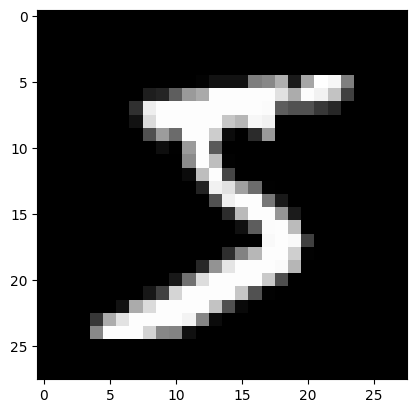

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt. imshow(x_data. iloc[0].values. reshape (28,28), cmap='gray')

In [ ]:
#training / test data split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test
_size=0.20, random_state=4
print (X_train. shape) print (_test. shape) print (y_train. shape) print (y_test. shape)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import fetch_openml

mnist = fetch_openml ('mnist_784')
mnist.data. shape, mnist. target.shape
x_data = mnist.data
y_data = mnist. target

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=42)

model = LogisticRegression(max_iter=10, tol=0.0001, penalty='l2', C=1.0)

model.fit(X_train, y_train)

y_train_predict = model. predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_train_predict)
print(train_acc)
y_test_predict = model.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_test_predict)
print(test_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8824107142857143
0.8825714285714286


In [15]:
import numpy as np

# 행렬 X의 각 열들의 평균
X = np.array([
    [1, 1, 1, 0, 0],
    [3, 3, 3, 0, 0],
    [4, 4, 4, 0, 0],
    [5, 5, 5, 0, 0],
    [0, 2, 0, 4, 4],
    [0, 0, 0, 5, 5],
    [0, 1, 0, 2, 2]
])

# 각 열의 평균
mu = X.mean(axis=0)

print(mu)

[1.85714286 2.28571429 1.85714286 1.57142857 1.57142857]


In [21]:
# 각 값에서 평균 제거
X_centered = X - mu # X - u

print(X_centered)

[[-0.85714286 -1.28571429 -0.85714286 -1.57142857 -1.57142857]
 [ 1.14285714  0.71428571  1.14285714 -1.57142857 -1.57142857]
 [ 2.14285714  1.71428571  2.14285714 -1.57142857 -1.57142857]
 [ 3.14285714  2.71428571  3.14285714 -1.57142857 -1.57142857]
 [-1.85714286 -0.28571429 -1.85714286  2.42857143  2.42857143]
 [-1.85714286 -2.28571429 -1.85714286  3.42857143  3.42857143]
 [-1.85714286 -1.28571429 -1.85714286  0.42857143  0.42857143]]


In [22]:
cov_X = np.cov(X_centered, rowvar=False)

print(cov_X)

[[ 4.47619048  3.54761905  4.47619048 -3.4047619  -3.4047619 ]
 [ 3.54761905  3.23809524  3.54761905 -2.52380952 -2.52380952]
 [ 4.47619048  3.54761905  4.47619048 -3.4047619  -3.4047619 ]
 [-3.4047619  -2.52380952 -3.4047619   4.61904762  4.61904762]
 [-3.4047619  -2.52380952 -3.4047619   4.61904762  4.61904762]]


In [23]:
eigenvalues, Q_eigen_vectors = np.linalg.eig(cov_X)

print(Q_eigenvectors)

[[ 4.71496193e-01  3.55832289e-01 -7.07106781e-01  3.88683319e-01
   2.38840737e-02]
 [ 3.73691150e-01  4.12383958e-01  2.01204211e-15 -8.30839573e-01
  -1.41812677e-16]
 [ 4.71496193e-01  3.55832289e-01  7.07106781e-01  3.88683319e-01
  -2.38840737e-02]
 [-4.55926313e-01  5.36985212e-01 -7.53994246e-17  6.14660890e-02
  -7.06703298e-01]
 [-4.55926313e-01  5.36985212e-01 -1.13563341e-16  6.14660890e-02
   7.06703298e-01]]


In [24]:
selected_Q_eigen_vectors = Q_eigen_vectors[:, :2]

In [25]:
X_PCA = np.dot(X_centered, selected_Q_eigen_vectors)

print(X_PCA)

[[ 0.14417203 -2.82787396]
 [ 2.7775391  -0.57977689]
 [ 4.09422264  0.54427165]
 [ 5.41090617  1.66832018]
 [-4.07253971  1.16872711]
 [-5.73177463  1.41792961]
 [-2.6225256  -1.3915977 ]]


In [27]:
cov_X_PCA = np.cov(X_PCA.T)

print(cov_X_PCA)

[[1.83487557e+01 5.95209621e-16]
 [5.95209621e-16 2.78758798e+00]]
